# Amazon Baby Products Sentiment Analysis


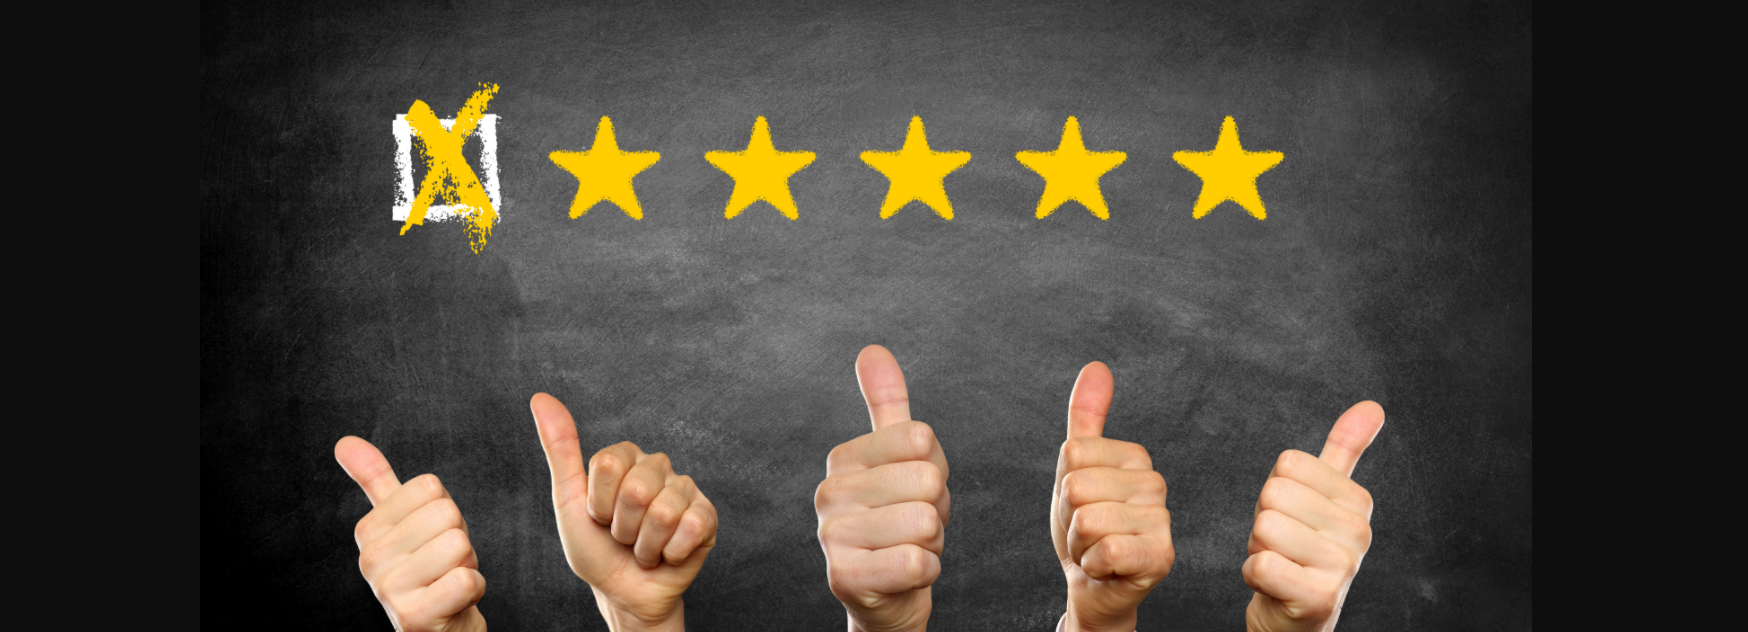

In [1]:
from IPython.display import Image
Image(filename ='C:/amazon logo.png')

### I. Introduction

            As per one survey, 72% of consumers will take action only after reading a positive review. 
As a frequent Amazon user, I have always been curious about the online review system and how do they impact any consumer's purchasing decision. With this work I am interested in exploring the structure of a large database of Amazon reviews and analysing this information through effective visualization so as to be a smarter consumer as well as reviewer. For the sake of simplicity I am going to limit my analysis to only Amazon baby dataset. 

#### Below is a sample Amazon review. It consists of the following information:

* Rating (1 - 5 stars)
* The review
* A summary of the review
* The number of people who have voted if this review is helpful or not.

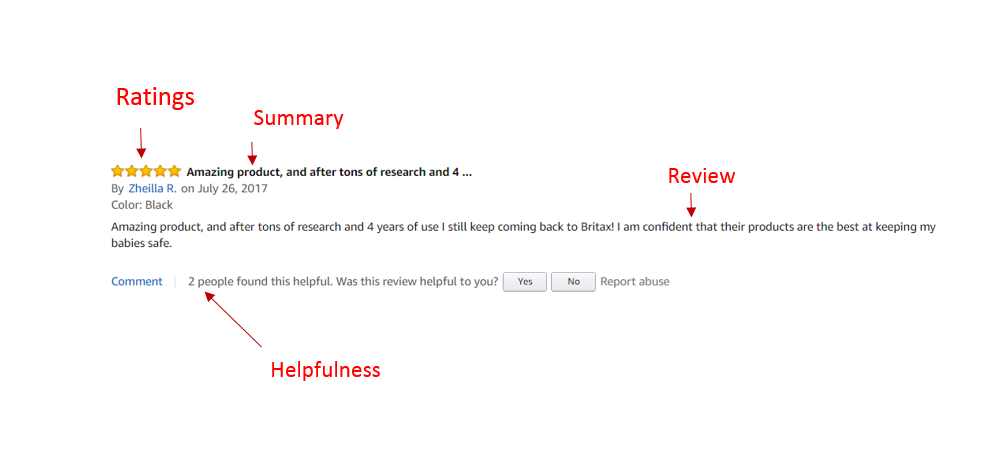

In [2]:
from IPython.display import Image
Image(filename ='C:/Amazon Rev.png')
# ![image](imagename.png "Title")

### II. Objective

I am going to use a data of over 59,000 reviews of Amazon Baby products that is available via this link here.
http://jmcauley.ucsd.edu/data/amazon/links.html. 
This database contains 19 different features along with each of the elements of a review pictured above. So our initial goals would be to
* Perform some basic exploratory data analysis to better understand reviews.
* What are the properties of helpful reviews?
* How reviewText correlate to overall ratings.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from wordcloud import WordCloud , STOPWORDS

from nltk.corpus import stopwords
from nltk import word_tokenize

from string import punctuation

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import precision_score, confusion_matrix
from textblob import TextBlob
from sklearn.metrics import f1_score
from sklearn import metrics

import matplotlib.pyplot as plt
# from gensim.models import Word2Vec
import itertools
import seaborn as sns
import missingno as msno


import pandasql as pdsql
from pandasql import sqldf


C:\Users\anands\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### III. Reading Data

In [4]:
df = pd.read_csv('C:\Baby_review.csv',low_memory=False)

In [5]:
pd.read_csv('C:\Baby_review.csv',low_memory=False)

,reviewerID,asin,reviewerName,helpful,helpful_num,helpful_den,reviewText,overall,summary,unixReviewTime,reviewTime,exclamationcount,questioncount,charcount,wordcount,capcount,avgrating,diffrating,ishelpful
0,A3NMPMELAZC8ZY,097293751X,Jakell,"[3, 3]",3,3,This book is perfect! I'm a first time new mo...,5,Great for newborns,1359244800,"01 27, 2013",1,0,250,46,0,4.000000,1.000000,1
1,A3O4ATU0ENBKTU,097293751X,MAPN,"[1, 1]",1,1,I use this so that our babysitter (grandma) ca...,5,Compact and Easy way to record the milestones,1361836800,"02 26, 2013",0,0,734,148,0,4.000000,1.000000,1
2,A2SYNL4YX73KNY,097293751X,"R. Davidson ""Jrdpa""","[2, 2]",2,2,"I like this log, but think it would work bette...",3,Needs clearer AM & PM,1369008000,"05 20, 2013",0,0,288,59,2,4.000000,1.000000,1
3,A2Q2A6JKY95RTP,097293751X,R. Garrelts,"[2, 2]",2,2,My wife and I have a six month old baby boy an...,3,Expensive and Somewhat Limited Format,1381968000,"10 17, 2013",0,0,2959,505,9,4.000000,1.000000,1
4,A21I33AWNOWMK8,9729375011,EmilyS,"[1, 2]",1,2,I have used this book since my son was born. ...,5,Great product!,1364256000,"03 26, 2013",0,0,595,117,0,4.500000,0.500000,0
5,ALRN58JO86V5E,9729375011,John Ramahlo Jr.,"[2, 3]",2,3,THis has been helpful in tracking the feedings...,4,ONe simple thing would improve it.,1355011200,"12 9, 2012",0,0,653,139,5,4.500000,0.500000,1
6,AXEEHEUKQILR0,9729375011,K. Kadrmas,"[2, 2]",2,2,if I didn't suck at documenting. Not sure exac...,4,Could be very useful...,1381363200,"10 10, 2013",0,0,365,70,0,4.500000,0.500000,1
7,A3KZ91O8KA1IAZ,9729375011,"LMCR ""HauteDiva""","[1, 2]",1,2,The layout of the hours are a little tricky bu...,4,"efficient, useful, detailed",1385164800,"11 23, 2013",0,0,415,81,0,4.500000,0.500000,0
8,A1OG2X4KR2U1GE,9729375011,M&amp;M,"[1, 1]",1,1,This is the best way to keep track of when you...,5,Must have for new moms,1363478400,"03 17, 2013",1,0,216,46,0,4.500000,0.500000,1
9,A3EG1F4UBURE6O,9729375011,Maria M. Shaw,"[6, 6]",6,6,"Please, please take this to the hospital with ...",5,Life-saver!,1363996800,"03 23, 2013",1,0,967,176,1,4.500000,0.500000,1


In [6]:
df.shape

(56950, 19)

In [7]:
df.columns.tolist()

['reviewerID',
 'asin',
 'reviewerName ',
 'helpful',
 'helpful_num',
 'helpful_den',
 'reviewText',
 'overall',
 'summary',
 'unixReviewTime',
 'reviewTime',
 'exclamationcount',
 'questioncount',
 'charcount',
 'wordcount',
 'capcount',
 'avgrating',
 'diffrating',
 'ishelpful']

In [8]:
df.head(2)

,reviewerID,asin,reviewerName,helpful,helpful_num,helpful_den,reviewText,overall,summary,unixReviewTime,reviewTime,exclamationcount,questioncount,charcount,wordcount,capcount,avgrating,diffrating,ishelpful
0,A3NMPMELAZC8ZY,097293751X,Jakell,"[3, 3]",3,3,This book is perfect! I'm a first time new mo...,5,Great for newborns,1359244800,"01 27, 2013",1,0,250,46,0,4.0,1.0,1
1,A3O4ATU0ENBKTU,097293751X,MAPN,"[1, 1]",1,1,I use this so that our babysitter (grandma) ca...,5,Compact and Easy way to record the milestones,1361836800,"02 26, 2013",0,0,734,148,0,4.0,1.0,1


In [9]:
df.sort_values(by='overall', ascending=False)[:3]

,reviewerID,asin,reviewerName,helpful,helpful_num,helpful_den,reviewText,overall,summary,unixReviewTime,reviewTime,exclamationcount,questioncount,charcount,wordcount,capcount,avgrating,diffrating,ishelpful
0,A3NMPMELAZC8ZY,097293751X,Jakell,"[3, 3]",3,3,This book is perfect! I'm a first time new mo...,5,Great for newborns,1359244800,"01 27, 2013",1,0,250,46,0,4.000000,1.000000,1
31934,A37QWKCN6XQV1I,B003FLLQX6,K Bosh,"[1, 1]",1,1,"Babies like faces, bright colors, and rattles....",5,"Fun, Perky, Baby's First Favorite",1301961600,"04 5, 2011",1,2,729,137,1,5.000000,0.000000,1
31939,A1ER8RH6UFTD1W,B003FLLQXG,Melanie Cintron,"[10, 11]",10,11,This rattle is great! The shape of it makes it...,5,Easy to grip for baby.,1287446400,"10 19, 2010",1,0,269,56,0,3.777778,1.222222,1


In [10]:
df.describe()

,helpful_num,helpful_den,overall,unixReviewTime,exclamationcount,questioncount,charcount,wordcount,capcount,avgrating,diffrating,ishelpful
count,56950.000000,56950.000000,56950.000000,5.695000e+04,56950.000000,56950.000000,56950.000000,56950.000000,56950.000000,56950.000000,56950.000000,56950.000000
mean,4.939701,5.987199,3.951975,1.329489e+09,0.879385,0.102476,724.742423,137.282476,0.616014,3.952153,0.924875,0.678244
std,23.655852,24.799907,1.308374,7.046482e+07,1.814582,0.493295,767.795333,142.234619,3.110724,0.595734,0.708137,0.467154
min,0.000000,1.000000,1.000000,9.824544e+08,0.000000,0.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,1.306454e+09,0.000000,0.000000,282.000000,54.000000,0.000000,3.636364,0.400000,0.000000
50%,1.000000,2.000000,4.000000,1.353802e+09,0.000000,0.000000,498.000000,96.000000,0.000000,4.000000,0.769231,1.000000
75%,3.000000,4.000000,5.000000,1.376006e+09,1.000000,0.000000,876.000000,167.000000,0.000000,4.352941,1.272727,1.000000
max,1206.000000,1214.000000,5.000000,1.405987e+09,74.000000,18.000000,21655.000000,3855.000000,183.000000,5.000000,3.821429,1.000000


### IV. Exploratory Data Analysis

#### IV.I- Distribution of overall ratings

In [11]:
df['overall'].value_counts()

5    28368
4    11717
3     7463
1     4836
2     4566
Name: overall, dtype: int64

In [12]:
df1 = df.groupby(['overall']).agg({'reviewerID': 'count'})
df1['% of total']= df1['reviewerID']/df1['reviewerID'].sum()*100
# df1['% of total'] = df1['% of total'].map('{:,.2f}%'.format)
df1

,reviewerID,% of total
overall,,
1,4836,8.491659
2,4566,8.017559
3,7463,13.104478
4,11717,20.574188
5,28368,49.812116


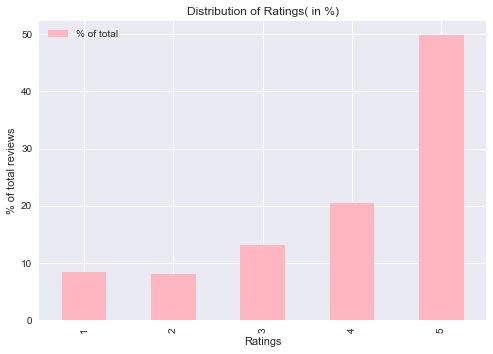

In [13]:
df1.reset_index(level = 0 , inplace = True)
df1
s = df1[['overall','% of total']]
s.set_index('overall', inplace = True)
s.plot(kind = 'bar', color = 'Lightpink')
plt.xlabel("Ratings")
plt.ylabel("% of total reviews")
plt.title("Distribution of Ratings( in %)")


Looking at the distribution of ratings, we see that 5-star reviews constitute a large proportion (50%) of all reviews. The next most prevalent rating is 4-stars(21%), followed by 3-star (13%), 1-star (8.5%), and finally 2-star reviews (8.0%).

#### IV.II- Reviews and their helpfulness

* Reviews are voted upon based on how helpful other reviewers find them. The most helpful reviews appear near the top of the list of reviews and are hence more visible. As such, I was interested in exploring the properties of helpful reviews.

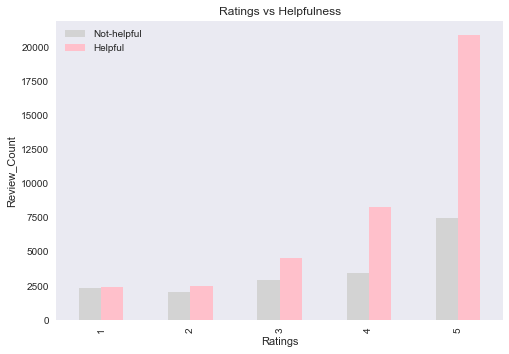

In [14]:
t2 = pd.crosstab(df['overall'], df['ishelpful'])
t2.columns = ["Not-helpful","Helpful"]
t2.index = [1,2,3,4,5]

t2.plot(kind='bar', stacked=False, color=['Lightgrey','pink'], grid=False)
plt.xlabel("Ratings")
plt.ylabel("Review_Count")
plt.title("Ratings vs Helpfulness")

In [15]:
t1 = pd.crosstab(df['overall'], df['ishelpful'], margins = True)
t1.columns = ["Not-helpful","helpful","Total"]
t1.index = [1,2,3,4,5,"Total reviews"]
t0 = t1/t1.ix["Total reviews","Total"]*100
t0['Total'] = t0['Total'].map('{:,.2f}%'.format)
t0

,Not-helpful,helpful,Total
1,4.180860,4.310799,8.49%
2,3.622476,4.395083,8.02%
3,5.165935,7.938543,13.10%
4,6.015803,14.558385,20.57%
5,13.190518,36.621598,49.81%
Total reviews,32.175593,67.824407,100.00%


I looked at the percentage of those reviews that users found helpful or not helpful for each Star rating. And we notice that as the ratings increase, the reviews become more helpful. For 5-star reviews, 36% reviews were found helpful and 13% not helpful.

#### IV.III- Avg word_cnt per review

It will be interesting to visualize how word counts vary for reviews. Further, I would also like to explore the correlation  between word count and other characteristics of a given review like helpfulness.

#### Word cnt wrt Rating(overall)

In [16]:
pysql = lambda q: pdsql.sqldf(q, globals())
str1= """SELECT overall as Ratings,avg(wordcount), min(wordcount), max(wordcount)
from df
group by overall
"""
p1 = pysql(str1)
p1.head(10)
p1
# p1.plot(kind = 'box')

,Ratings,avg(wordcount),min(wordcount),max(wordcount)
0,1,117.148677,2,2978
1,2,132.210031,12,1262
2,3,144.172451,4,3855
3,4,159.316293,2,2232
4,5,130.617844,1,2352


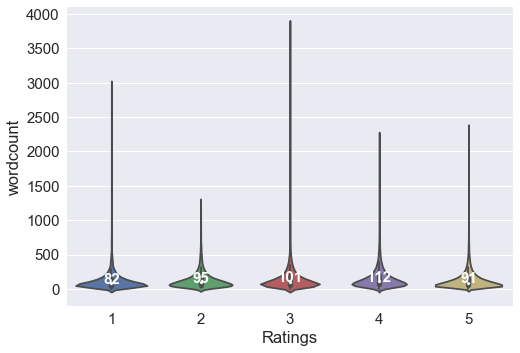

In [17]:
sns.set_context('notebook', font_scale=1.5, rc={'line.linewidth': 3})

pysql = lambda q: pdsql.sqldf(q, globals())
str1= """SELECT overall as Ratings, wordcount
from df
"""
p2 = pysql(str1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
ax = sns.violinplot( p2.Ratings,p2.wordcount, palette = 'deep', color = color)
medians = p2.groupby(['Ratings'])['wordcount'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.25, median_labels[tick], 
            horizontalalignment='center', size='small', color='w', weight='bold')
    


5-star reviews have the second lowest median word count (91 words), while 3-star reviews have relatively higher median word count (101 words).

#### IV.IV- Avg word_cnt per review on helpfulness index

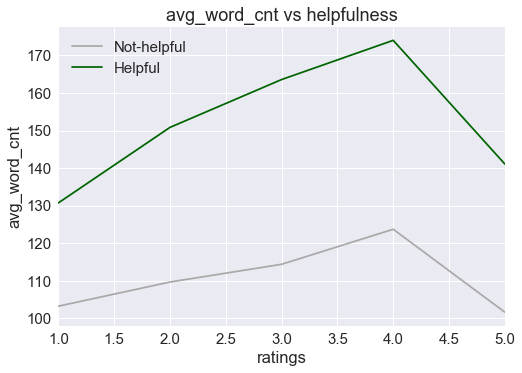

In [18]:
pysql = lambda q: pdsql.sqldf(q, globals())

str1= """SELECT overall, Avg(wordcount) as avg_wordcount
from df
where ishelpful = 0
group by overall, ishelpful
"""
df1 = pysql(str1)
# df1.head(10)
# ax = df1.plot(x='overall', y='avg_wordcount',  color='g')

str2= """SELECT overall, Avg(wordcount) as avg_wordcount
from df
where ishelpful = 1
group by overall, ishelpful
"""
df1 = pysql(str1)
df2 = pysql(str2)
ax = df1.plot(x='overall', y='avg_wordcount', color='Darkgrey', label = 'Not-helpful')
df2.plot(x='overall', y='avg_wordcount', color='Darkgreen', label = 'Helpful', ax = ax)
plt.ylabel('avg_word_cnt')
plt.xlabel('ratings')
plt.title("avg_word_cnt vs helpfulness")


The word counts for helpful reviews and not helpful reviews have a similar distribution.  However, not helpful reviews have a larger concentration of reviews with low word count and helpful reviews have more longer reviews. 

#### IV.V-Regular vs Non Regular Reviewers 

We are interested to draw a comparision between the reviews of regular vs not regular reviewers. So who are regular reviewers? Our obvious choice would be those customers who have clearly reviewed more than once. the more the better! After analysing the review counts, we found out that there is a good distinction of review counts between <3 reviews and more than 3 reviews /customer in the dataset. So, we assigned reviewers as frequent reviewers who have more than 3 reviews and vice-versa. The goal here is to identify if there is any behavioral distinction between frequent and not frequent reviewer groups.

In [19]:
pysql = lambda q: pdsql.sqldf(q, globals())

str1= """SELECT reviewerID, count(overall) as frequency
from df
group by reviewerID
"""
df4 = pysql(str1)
df4['% of total review']= df4['frequency']/df4['frequency'].sum()*100
df4['% of total review'] = df4['% of total review'].map('{:,.2f}%'.format)
df4["frequency"].value_counts()

2     4143
1     4047
3     3267
4     2154
5     1395
6      739
7      431
8      251
9      178
10     135
11      90
12      71
13      57
14      31
17      29
15      28
16      25
18      14
20      12
19      11
21       8
22       8
32       6
26       6
23       5
24       4
27       3
36       2
25       2
38       2
31       1
49       1
48       1
30       1
45       1
33       1
58       1
44       1
34       1
35       1
57       1
37       1
53       1
47       1
Name: frequency, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011C2A908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011AE26A0>]], dtype=object)

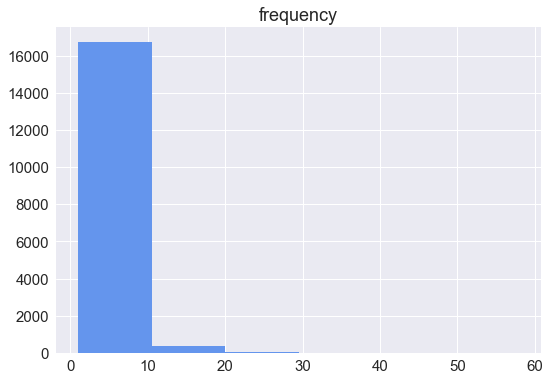

In [20]:
df4.hist(layout=(1,2),bins = 6, figsize = [20,6], color = 'cornflowerblue') 

Here Frequency is the number of reviews completed by a given customer on the website. From the above histogram we see we have quite a good concentration of reviewers in the dataset reviewing in the range of 1-10 times. After analysing further we found below.
* We have 8977 Regular Customers with Review frequency > 2
* We have 8190 customers which are not so regular having frequency <= 2
* Majority of the reviews(7410) are done by customers who have reviewed atleast 2 or 3 times.

#### IV.VI Do "more reviews" mean "more helpful"  ?

In [21]:
str1="""Select reviewerID, count(overall) as Frequency, overall as Stars, ishelpful as Helpful
from df
group by reviewerID, overall
"""
df5 = pysql(str1)
# df5['% of total review']= df5['frequency']/df4['frequency'].sum()*100
# df5['% of total review'] = df5['% of total review'].map('{:,.2f}%'.format)
# df5['reg_nonreg']=df5['frequency'].apply(lambda x: "Non-Regular" if x < 3 else "Regular")

df5['TotalFrequency']= df5.groupby('reviewerID').Frequency.transform(np.sum)
s = df5[['Helpful','TotalFrequency']]
s
t1 = pd.crosstab(s['TotalFrequency'], s['Helpful'], margins = True)
t1.columns = ['Not-Helpful', 'Helpful', 'Total Reviewers']
t1
# t1.plot(color = ['orange','green','grey'])
# plt.xlabel("No of times user reviewed")
# plt.ylabel("Total Reviews")
# plt.title("Review frequency vs Helpfulness")

,Not-Helpful,Helpful,Total Reviewers
TotalFrequency,,,
1,1557,2490,4047
2,2579,4082,6661
3,2415,4303,6718
4,1752,3387,5139
5,1206,2583,3789
6,704,1472,2176
7,450,884,1334
8,258,562,820
9,199,399,598


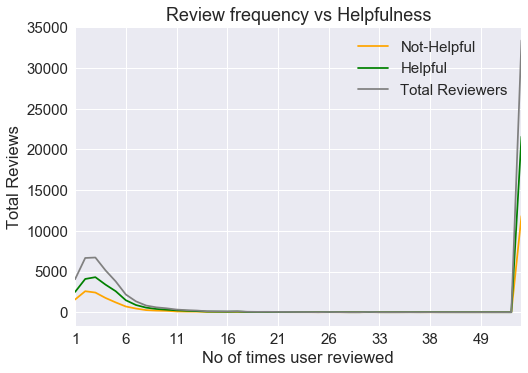

In [22]:
t1.plot(color = ['orange','green','grey'])
plt.xlabel("No of times user reviewed")
plt.ylabel("Total Reviews")
plt.title("Review frequency vs Helpfulness")

There is no striking pattern detected from the above plot generated for Total Frequecy of the reviews vs Helpfulness. However, we clearly see more helpful reviews for each frequency. Also, we notice more helpful reviews than not -useful ones for the users who have reviewed for about 2-8 times as opposed to higher frequency holders. Also, as the review frequency increases that is the number of times user gives review increases, so does the helpful index in general. So we cab say more reviews are better!  

### V. Inferences

  * In general positive reviews are common in this dataset.
  * We have more 50 % of the total reviews assigned as 5 -star.
  * Best reviews (5-star) are relatively shorter.
  * Longer reviews are more helpful.
  * Frequent reviewers write longer and helpful reviews.

### Thank You!